# Global Search Algorithms

The solution of the unconstrained optimization problem

\begin{equation}
\min f\left(\vec x\right)
\end{equation}

can always be found by solving

\begin{equation}
\nabla f\left(\vec x^\star\right) = \vec 0\,.
\end{equation}

We choose an initial point and the generate a sequence of iterates. Typically, the best we can hope for is that the sequence converges to a local minimizer. For this reason, it is often desirable for the initial point to be close to a global optimizer. Moreover, these methods require first derivatives (and als second derivatives in the case of Newton's method).

In this lecture we discuss a method that is global in nature in the sense that they attempt to search throughout the entire feasible set.

The _Nelder-Mead simplex_ method uses only objective function values and do not require derivatives. Consequently, it is applicable to a much wider class of optimization problems.

## The Nelder-Mead Simplex Algorithm

The Nelder-Mead algorithm uses the concept of a _simplex_. A simplex is a geometric object determined by an assembly of $n+1$ points, $\vec{p}_{0},\vec{p}_{1},\dots,\vec{p}_{n}$, in the n-dimensional space such that

\begin{equation}
\det\begin{bmatrix}
\vec{p}_{0} & \vec{p}_{1} & \cdots & \vec{p}_{n}\\
1 & 1 & \cdots & 1
\end{bmatrix}\neq0\,.
\end{equation}

This condition ensures that two points in $\mathbb R$ do not coincide, three points in $\mathbb R^{2}$ are not collinear, four points in $\mathbb R^{3}$ are not coplanar, and so on. Thus, a simplex in $\mathbb R$ is a line segment, in $\mathbb R^{2}$ it is a triangle, while a simplex in $\mathbb R^{3}$ is a tetrahedron; in each case it encloses a finite $n$-dimensional volume.

Suppose that we wish to minimize $f\left(\vec{x}\right),\,\vec{x}\in\mathbb R^{n}$.
To start the algorithm, we initialize a simplex of $n+1$ points.
A possible way to set up a simplex is to start with an initial point
$\vec{x}^{\left(0\right)}=\vec{p}_{0}$ and generate the remaining
points of the initial simplex as follows:

\begin{equation}
\vec{p}_{i}=\vec{p}_{0}+\lambda_{i}\vec{e}_{i},\quad i=1,2,\dots,n\:,
\end{equation}

where the $\vec{e}_{i}$ are unit vectors constituting the natural
basis of $\mathbb R^{n}$. The positive constant coefficients $\lambda_{i}$
are selected in such a way that their magnitudes reflect the length
scale of the optimization problem.

Our objective is to modify the initial simplex stage by stage so that
the resulting simplices converge toward the minimizer. At each iteration
we evaluate the function $f$ at each point of the simplex. In the
function minimization process, the point with the largest function
value is replaced with another point. The process for modifying the
simplex continues until it converges toward the function minimizer.

We now present the rules for modifying the simplex stage by stage.
To aid in our presentation, we use a two-dimensional example to illustrate
the rules. We begin by selecting the initial set of $n+1$ points
that are to form the initial simplex. We next evaluate $f$ at each
point and order the $n+1$ vertices to satisfy

\begin{equation}
f\left(\vec{p}_{0}\right)\leq f\left(\vec{p}_{1}\right)\leq\cdots\leq f\left(\vec{p}_{n}\right)\,.
\end{equation}

For the two-dimensional case we let $\vec{p}_{l}$, $\vec{p}_{n}$
and $\vec{p}_{s}$ denote the points of the simplex for which $f$
is largest, next largest and smallest. We next compute $\vec{p}_{g}$,
the _centroid_ (center of gravity) of the best $n$ points:

\begin{equation}
\vec{p}_{g}=\frac{1}{n}\sum_{i=0}^{n-1}\vec{p}_{i}\,.
\end{equation}

We then reflect the worst vertex, $\vec{p}_{n}$, in $\vec{p}_{g}$
using a _reflection coefficient_ $\rho>0$ to obtain the reflection
point

\begin{equation}
\vec{p}_{r}=\vec{p}_{g}+\rho\left(\vec{p}_{g}-\vec{p}_{n}\right)\,.
\end{equation}

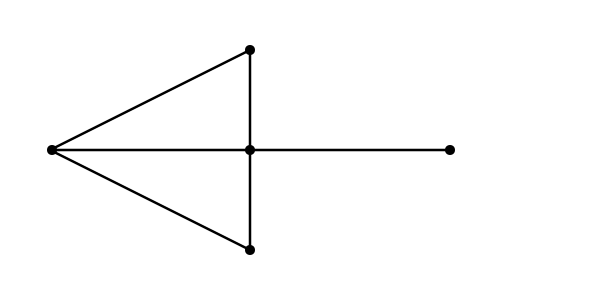

In [1]:
using NativeSVG

Drawing(width = "12cm", height = "6cm", viewBox = "0 0 600 300", preserveAspectRatio="none") do
    circle(cx = "52", cy = "150", r = "5", fill = "black")
    circle(cx = "250", cy = "50", r = "5", fill = "black")
    circle(cx = "250", cy = "250", r = "5", fill = "black")
    circle(cx = "250", cy = "150", r = "5", fill = "black")
    circle(cx = "450", cy = "150", r = "5", fill = "black")
    polyline(
        points="50, 150 250, 150 250, 50 50, 150 250, 250 250, 150 450 150", 
        fill="none", stroke="black", stroke_width="2.5"
    )
    latex("\\vec p_l", x = "40", y = "160", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_n", x = "260", y = "40", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_s", x = "260", y = "240", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_g", x = "210", y = "160", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_r", x = "440", y = "160", width = "60", height = "60", font_size = "16pt")
end

A typical value is $\rho=1$. 

We proceed to evaluate $f$ at $\vec{p}_{r}$. If $f\left(\vec{p}_{0}\right)\leq f\left(\vec{p}_{r}\right)<f\left(\vec{p}_{n-1}\right)$,
then the point $\vec{p}_{r}$ replaces $\vec{p}_{l}$ to form a new
simplex and we terminate the iteration. We proceed to repeat the process.

If , however, $f\left(\vec{p}_{r}\right)<f\left(\vec{p}_{0}\right)$,
so that the point $\vec{p}_{r}$ yields the smallest function value
among the points of the simplex, we argue that this direction is a
good one. In this case we increase the distance traveled using an
_expansion coefficient_ $\chi>1$, e.g. $\chi=2$, to obtain

\begin{equation}
\vec{p}_{e}=\vec{p}_{g}+\chi\left(\vec{p}_{r}-\vec{p}_{g}\right)\,.
\end{equation}

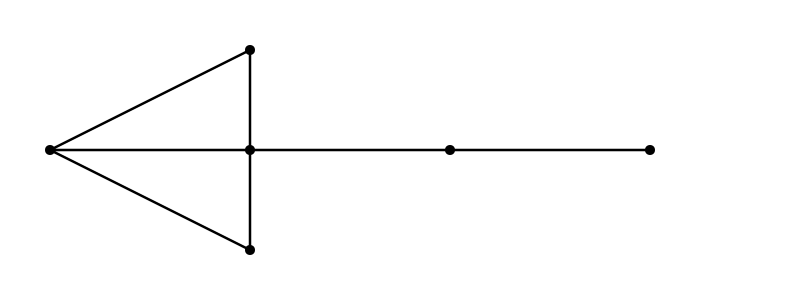

In [2]:
Drawing(width = "16cm", height = "6cm", viewBox = "0 0 800 300", preserveAspectRatio="none") do
    circle(cx = "50", cy = "150", r = "5", fill = "black")
    circle(cx = "250", cy = "50", r = "5", fill = "black")
    circle(cx = "250", cy = "250", r = "5", fill = "black")
    circle(cx = "250", cy = "150", r = "5", fill = "black")
    circle(cx = "450", cy = "150", r = "5", fill = "black")
    circle(cx = "650", cy = "150", r = "5", fill = "black")
    polyline(
        points="50, 150 250, 150 250, 50 50, 150 250, 250 250, 150 650 150", 
        fill="none", stroke="black", stroke_width="2.5"
    )
    latex("\\vec p_l", x = "40", y = "160", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_n", x = "260", y = "40", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_s", x = "260", y = "240", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_g", x = "210", y = "160", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_r", x = "440", y = "160", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_e", x = "640", y = "160", width = "60", height = "60", font_size = "16pt")
end

This operation yields a new point on the line $\vec{p}_{n}\vec{p}_{g}\vec{p}_{r}$
extend beyond $\vec{p}_{r}$. If $f\left(\vec{p}_{e}\right)<f\left(\vec{p}_{r}\right)$,
the expansion is declared a success and $\vec{p}_{e}$ replaces $\vec{p}_{n}$
in the next simplex. If, on the other hand, $f\left(\vec{p}_{e}\right)\geq f\left(\vec{p}_{r}\right)$,
the expansion is a failure and $\vec{p}_{r}$ replaces $\vec{p}_{n}$.

Finally, if $f\left(\vec{p}_{r}\right)\geq f\left(\vec{p}_{n-1}\right)$,
the reflected point $\vec{p}_{r}$ would constitute the point with
the largest function value in the new simplex. Then in the next step
it would be reflected in $\vec{p}_{g}$, probably an unfruitful operation.
Instead, this case is dealt with by a _contraction_ operation
in one of two ways. First, if $f\left(\vec{p}_{r}\right)<f\left(\vec{p}_{n}\right)$,
then we contract $\left(\vec{p}_{r}-\vec{p}_{g}\right)$ with a _contraction
coefficient_ $0<\gamma<1$, e.g. $\gamma=\frac{1}{2}$, to obtain

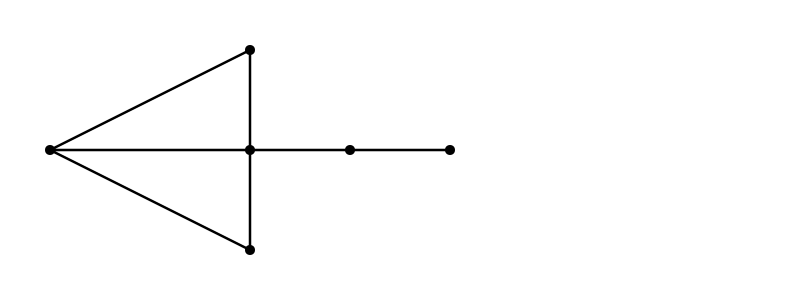

In [3]:
Drawing(width = "16cm", height = "6cm", viewBox = "0 0 800 300", preserveAspectRatio="none") do
    circle(cx = "50", cy = "150", r = "5", fill = "black")
    circle(cx = "250", cy = "50", r = "5", fill = "black")
    circle(cx = "250", cy = "250", r = "5", fill = "black")
    circle(cx = "250", cy = "150", r = "5", fill = "black")
    circle(cx = "450", cy = "150", r = "5", fill = "black")
    circle(cx = "350", cy = "150", r = "5", fill = "black")
    polyline(
        points="50, 150 250, 150 250, 50 50, 150 250, 250 250, 150 450 150", 
        fill="none", stroke="black", stroke_width="2.5"
    )
    latex("\\vec p_l", x = "40", y = "160", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_n", x = "260", y = "40", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_s", x = "260", y = "240", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_g", x = "210", y = "160", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_r", x = "440", y = "160", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_c", x = "340", y = "160", width = "60", height = "60", font_size = "16pt")
end

\begin{equation}
\vec{p}_{c}=\vec{p}_{g}+\gamma\left(\vec{p}_{r}-\vec{p}_{g}\right)\,.
\end{equation}

We refer to this operation as the _outside contraction_. If,
on the other hand, $f\left(\vec{p}_{r}\right)\geq f\left(\vec{p}_{n}\right)$,
then $\vec{p}_{n}$ replaces $\vec{p}_{r}$ in the contraction operation
and we get

\begin{equation}
\vec{p}_{c}=\vec{p}_{g}+\gamma\left(\vec{p}_{n}-\vec{p}_{g}\right)\,.
\end{equation}

This operation is referred to as the _inside contraction_. 

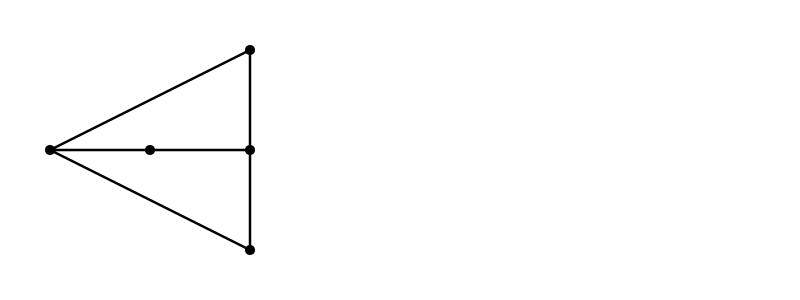

In [4]:
Drawing(width = "16cm", height = "6cm", viewBox = "0 0 800 300", preserveAspectRatio="none") do
    circle(cx = "50", cy = "150", r = "5", fill = "black")
    circle(cx = "250", cy = "50", r = "5", fill = "black")
    circle(cx = "250", cy = "250", r = "5", fill = "black")
    circle(cx = "250", cy = "150", r = "5", fill = "black")
    circle(cx = "150", cy = "150", r = "5", fill = "black")
    polyline(
        points="50, 150 250, 150 250, 50 50, 150 250, 250 250, 150", 
        fill="none", stroke="black", stroke_width="2.5"
    )
    latex("\\vec p_l", x = "40", y = "160", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_n", x = "260", y = "40", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_s", x = "260", y = "240", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_g", x = "210", y = "160", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_c", x = "140", y = "160", width = "60", height = "60", font_size = "16pt")
end

If , in either case, $f\left(\vec{p}_{c}\right)\leq f\left(\vec{p}_{n}\right)$,
the contraction is considered a success, and we replace $\vec{p}_{n}$
with $\vec{p}_{c}$ in the new simplex. If, however, $f\left(\vec{p}_{c}\right)>f\left(\vec{p}_{n}\right)$,
the contraction is a failure, and in this case a new simplex can be
formed by retaining $\vec{p}_{0}$ only and halving the distance from
$\vec{p}_{0}$ to every point in the simplex. We can refer to this
event as a _shrinkage operation_. In general, the shrink step
produces the $n$ new vertices of the new simplex according to the
formula

\begin{equation}
\vec{v}_{i}=\vec{p}_{0}+\sigma\left(\vec{p}_{i}-\vec{p}_{0}\right)\,,\quad i=1,2,\dots,n\,,
\end{equation}

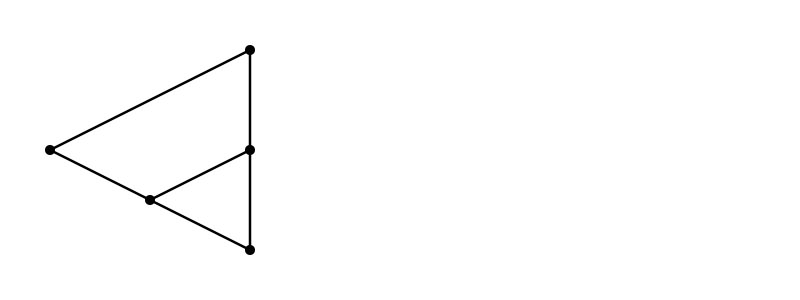

In [5]:
Drawing(width = "16cm", height = "6cm", viewBox = "0 0 800 300", preserveAspectRatio="none") do
    circle(cx = "50", cy = "150", r = "5", fill = "black")
    circle(cx = "250", cy = "50", r = "5", fill = "black")
    circle(cx = "250", cy = "250", r = "5", fill = "black")
    circle(cx = "250", cy = "150", r = "5", fill = "black")
    circle(cx = "150", cy = "200", r = "5", fill = "black")
    polyline(
        points="250, 150 250, 50 50, 150 250, 250 250, 150 150, 200", 
        fill="none", stroke="black", stroke_width="2.5"
    )
    latex("\\vec p_l", x = "40", y = "160", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_n", x = "260", y = "40", width = "60", height = "60", font_size = "16pt")
    latex("\\vec p_s", x = "260", y = "240", width = "60", height = "60", font_size = "16pt")
end

where $\sigma=\frac{1}{2}$. Hence, the vertices of the new simplex
are $\vec{p}_{0},\vec{v}_{1},\dots,\vec{v}_{n}$.

When implementing the simplex algorithm, we need a tie-breaking rule
to order points in the case of equal function values. Often, the highest
possible index consistent with the relation

\begin{equation}
f\left(\vec{p}_{0}\right)\leq f\left(\vec{p}_{1}\right)\leq\cdots\leq f\left(\vec{p}_{n}\right)
\end{equation}

is assigned to the new vertex.

## Example

To show how the `Optim` package can be used, we minimize the Rosenbrock function, a classical test problem for numerical optimization. We'll assume that you've already installed the Optim package using Julia's package manager. First, we load Optim and define the Rosenbrock function:

In [ ]:
#using Pkg
#pkg"add Optim"

using Optim
using Plots

f(x)= (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2;

x= -1:0.007:2; y= -1:0.007:2; z= Surface((x,y)->log10.(f([x,y])), x, y);

p = contour(x,y,z)

Once we've defined this function, we can find the minimizer (the input that minimizes the objective) and the minimum (the value of the objective at the minimizer) using any of our favorite optimization algorithms. With a function defined, we just specify an initial point x and call optimize with a starting point `x0`:

In [ ]:
x0 = [0.0, 0.0]
optimize(f, x0, NelderMead())

Other local solvers are available. Below, we use BFGS, a quasi-Newton method that requires a gradient. If we pass f alone, Optim will construct an approximate gradient for us using central finite differencing:

In [ ]:
optimize(f, x0, BFGS())

For better performance and greater precision, you can pass your own gradient function. If your objective is written in all Julia code with no special calls to external (that is non-Julia) libraries, you can also use automatic differentiation, by using the `autodiff` keyword and setting it to `:forward`:

In [ ]:
optimize(f, x0, LBFGS(); autodiff = :forward)

For the Rosenbrock example, the analytical gradient can be shown to be:

In [ ]:
function g!(G, x)
G[1] = -2.0 * (1.0 - x[1]) - 400.0 * (x[2] - x[1]^2) * x[1]
G[2] = 200.0 * (x[2] - x[1]^2)
end

Note, that the functions we're using to calculate the gradient (and later the Hessian `h!`) of the Rosenbrock function mutate a fixed-sized storage array, which is passed as an additional argument called `G` (or `H` for the Hessian) in these examples. By mutating a single array over many iterations, this style of function definition removes the sometimes considerable costs associated with allocating a new array during each call to the `g!` or `h!` functions. 

In [ ]:
optimize(f, g!, x0, LBFGS())

In addition to providing gradients, you can provide a Hessian function `h!` as well. In our current case this is

In [ ]:
function h!(H, x)
    H[1, 1] = 2.0 - 400.0 * x[2] + 1200.0 * x[1]^2
    H[1, 2] = -400.0 * x[1]
    H[2, 1] = -400.0 * x[1]
    H[2, 2] = 200.0
end

Now we can use Newton's method for optimization by running:

In [ ]:
optimize(f, g!, h!, x0)

Which defaults to `Newton()` since a Hessian function was provided. Like gradients, the Hessian function will be ignored if you use a method that does not require it.

Note that `Optim` will not generate approximate Hessians using finite differencing because of the potentially low accuracy of approximations to the Hessians. Other than Newton's method, none of the algorithms provided by the Optim package employ exact Hessians.

## Algorithms

The first choice to be made is that of the order of the method. Zeroth-order methods do not have gradient information, and are very slow to converge, especially in high dimension. First-order methods do not have access to curvature information and can take a large number of iterations to converge for badly conditioned problems. Second-order methods can converge very quickly once in the vicinity of a minimizer. Of course, this enhanced performance comes at a cost: the objective function has to be differentiable, you have to supply gradients and Hessians, and, for second order methods, a linear system has to be solved at each step.

If you can provide analytic gradients and Hessians, and the dimension of the problem is not too large, then second order methods are very efficient. The _Newton method with trust region_ is the method of choice.

When you do not have an explicit Hessian or when the dimension becomes large enough that the linear solve in the Newton method becomes the bottleneck, first order methods should be preferred. _BFGS_ is a very efficient method, but also requires a linear system solve. _L-BFGS_ usually has a performance very close to that of BFGS, and avoids linear system solves (the parameter `m` can be tweaked: increasing it can improve the convergence, at the expense of memory and time spent in linear algebra operations). The _conjugate gradient method_ usually converges less quickly than L-BFGS, but requires less memory. _Gradient descent_ should only be used for testing.

When the objective function is non-differentiable or you do not want to use gradients, use zeroth-order methods. _Nelder-Mead_ is currently the most robust.

## Linesearches

Linesearches are used in every first- and second-order method except for the trust-region Newton method. Linesearch routines attempt to locate quickly an approximate minimizer of the univariate function

\begin{equation}
\alpha \rightarrow f\left(\vec x + \alpha \vec d\right)\,,
\end{equation}

where $\vec d$ is the descent direction computed by the algorithm. They vary in how accurate this minimization is. Two good linesearches are BackTracking and HagerZhang, the former being less stringent than the latter. For well-conditioned objective functions and methods where the step is usually well-scaled (such as L-BFGS or Newton), a rough linesearch such as BackTracking is usually the most performant. For badly behaved problems or when extreme accuracy is needed (gradients below the square root of the machine epsilon, about `10−8` with Float64), the HagerZhang method proves more robust. An exception is the conjugate gradient method which requires an accurate linesearch to be efficient, and should be used with the HagerZhang linesearch.

## Summary

As a very crude heuristic:

For a low-dimensional problem with analytic gradients and Hessians, use the Newton method with trust region. For larger problems or when there is no analytic Hessian, use L-BFGS, and tweak the parameter `m` if needed. If the function is non-differentiable, use Nelder-Mead.

Use the `HagerZhang` linesearch for robustness and `BackTracking` for speed.

Requires only a function handle:

- `NelderMead()`
- `SimulatedAnnealing()`, see next year
- `ParticleSwarm()`, see next year

Requires a function and gradient (will be approximated if omitted):

- `BFGS()`
- `LBFGS()`
- `ConjugateGradient()`
- `GradientDescent()`

Requires a function, a gradient, and a Hessian (cannot be omitted):

- `Newton()`
- `NewtonTrustRegion()`

Special methods for bounded univariate optimization:

- `Brent()`
- `GoldenSection()`